# Analyzing results
This notebook demonstrates how to compare results from looking at cross validation results.


In [11]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [21]:
base_path = "../results/final/"
experiments = ["f"+str(i) for i in range(1, 19)]
# experiments = ["f"+str(i) for i in [1, 2, 3, 4, 5, 6, 7, 19, 20, 21]] 

In [22]:
print('exp', 'highest_val_ridge_score', 'ndvi_ls', 'albedo_ls', sep='\t')
best_ndvi_vals = []
best_albedo_vals = []
for exp in experiments:
    df = pd.read_csv(os.path.join(base_path, exp, "results.csv"))
    df = df[df['iter'] > 5]
    table = pd.pivot_table(df, values='val_ridge_score', index=['ndvi_ls', 'albedo_ls'], aggfunc=np.mean)
    best_score = table['val_ridge_score'].max()
    best_ndvi_ls, best_albedo_ls = table[table['val_ridge_score'] == best_score].index[0]
    best_ndvi_vals.append(best_ndvi_ls)
    best_albedo_vals.append(best_albedo_ls)
    print(exp, best_score, best_ndvi_ls, best_albedo_ls, sep='\t')

exp	highest_val_ridge_score	ndvi_ls	albedo_ls
f1	0.40396447273998454	24	12
f2	0.3913496909003218	21	6
f3	0.3124350438661184	7	4
f4	0.3981567276740229	20	4
f5	0.3945345709254166	3	1
f6	0.31054660689220626	8	10
f7	0.39577919257216304	15	17
f8	0.38926198348024565	28	10
f9	0.3105600920088487	5	17
f10	0.4058269656106777	23	4
f11	0.390180050887906	4	2
f12	0.3251214295240469	14	19
f13	0.40124718606908605	25	5
f14	0.40599089863765725	16	7
f15	0.40049624964680175	16	3
f16	0.3766640754861856	28	2
f17	0.3928476290173044	21	8
f18	0.39645976436566116	21	4


In [23]:
np.mean(best_ndvi_vals), np.mean(best_albedo_vals)

(16.61111111111111, 7.5)

This suggests that an NDVI LS of 16 and an albedo length scale of 7 is likely going to be optimal and that experiment f14 is the one worth looking at.

## F14

In [24]:
df = pd.read_csv(os.path.join(base_path, "f1", "results.csv"))
df = df[df['iter'] > 5]

print(df['val_ridge_score'].max())
print(df['val_score'].max())

0.4929662185026496
0.8386428507832553


In [25]:
# Show average performance of each fold by creating a pivot table with average performance
table = pd.pivot_table(df, values='val_ridge_score', index=['fold'], aggfunc=[np.mean, np.std])
table

,mean,std
,val_ridge_score,val_ridge_score
fold,,
0,0.398540,0.013894
1,0.403205,0.021161
2,0.308767,0.028859
3,0.337459,0.028261
4,0.407619,0.028776


In [26]:
res = pd.pivot_table(df, index=['ndvi_ls', 'albedo_ls'], values=['val_ridge_score'], aggfunc=np.mean)

In [27]:
best_score = res['val_ridge_score'].max()
res[res['val_ridge_score'] == best_score].index[0]

(24, 12)

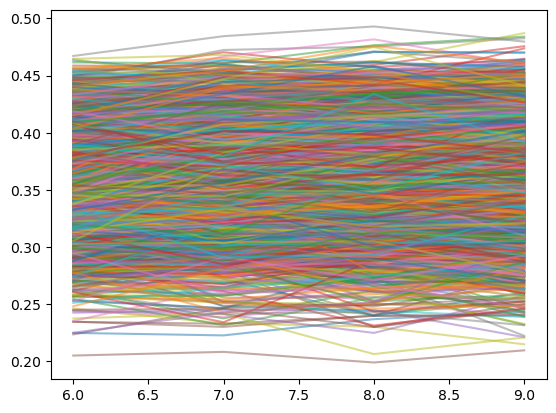

In [28]:
df_pivot = df.pivot_table(index=['fold', 'ndvi_ls', 'albedo_ls'], 
                          columns='iter', 
                          values='val_ridge_score')

# Plot each row
for i in range(len(df_pivot)):
    plt.plot(df_pivot.iloc[i], alpha=0.5)

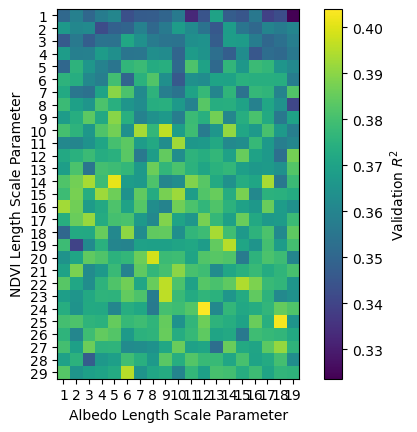

In [29]:
data = pd.pivot_table(df, index=['ndvi_ls'], columns=['albedo_ls'], values=['val_ridge_score'],aggfunc=np.mean)
plt.imshow(data.values)
plt.xticks(range(0, 19), labels=range(1,20))
plt.yticks(range(0, 29),labels=range(1, 30))
plt.xlabel("Albedo Length Scale Parameter")
plt.ylabel("NDVI Length Scale Parameter")
plt.colorbar(label='Validation $R^2$')

<AxesSubplot: xlabel='albedo_ls'>

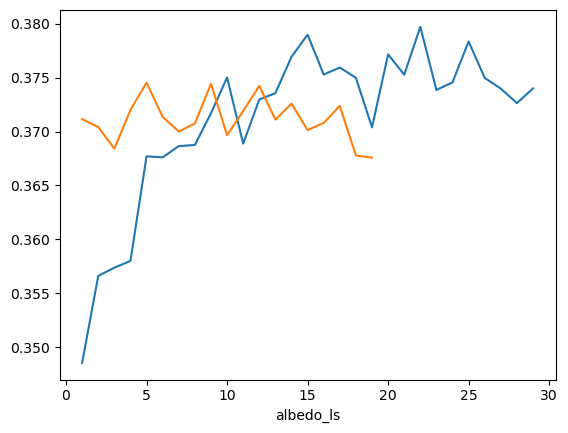

In [30]:
df.groupby('ndvi_ls')['val_ridge_score'].mean().plot()
df.groupby('albedo_ls')['val_ridge_score'].mean().plot()
